# Miscellaneous Examples




The first step is to import the module, and any other useful ones, such as numpy and matplotlib.


In [ ]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab. Installing package from pypi')
    !pip install pymagnet -q
else:
    print('Not running on CoLab.')

In [1]:
%matplotlib inline
# %matplotlib notebook
%config InlineBackend.figure_format = 'retina' # optional

import pymagnet as pm
import matplotlib.pyplot as plt
import numpy as np

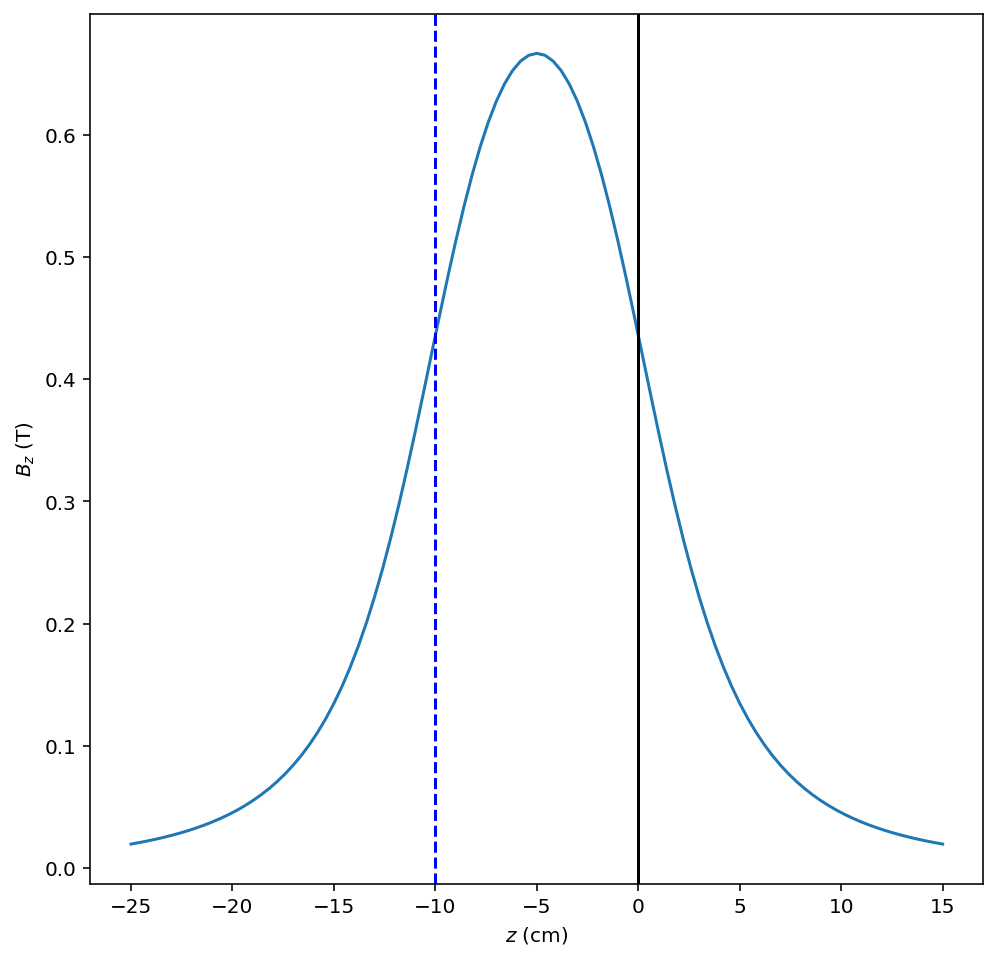

In [2]:
width = 10.0
m_cube = pm.magnets.Cube(width= width, Jr = 1.0,
                            center=(0.0, 0.0, -width/2))

pm.plots.plot_1D_field(m_cube, unit='cm')

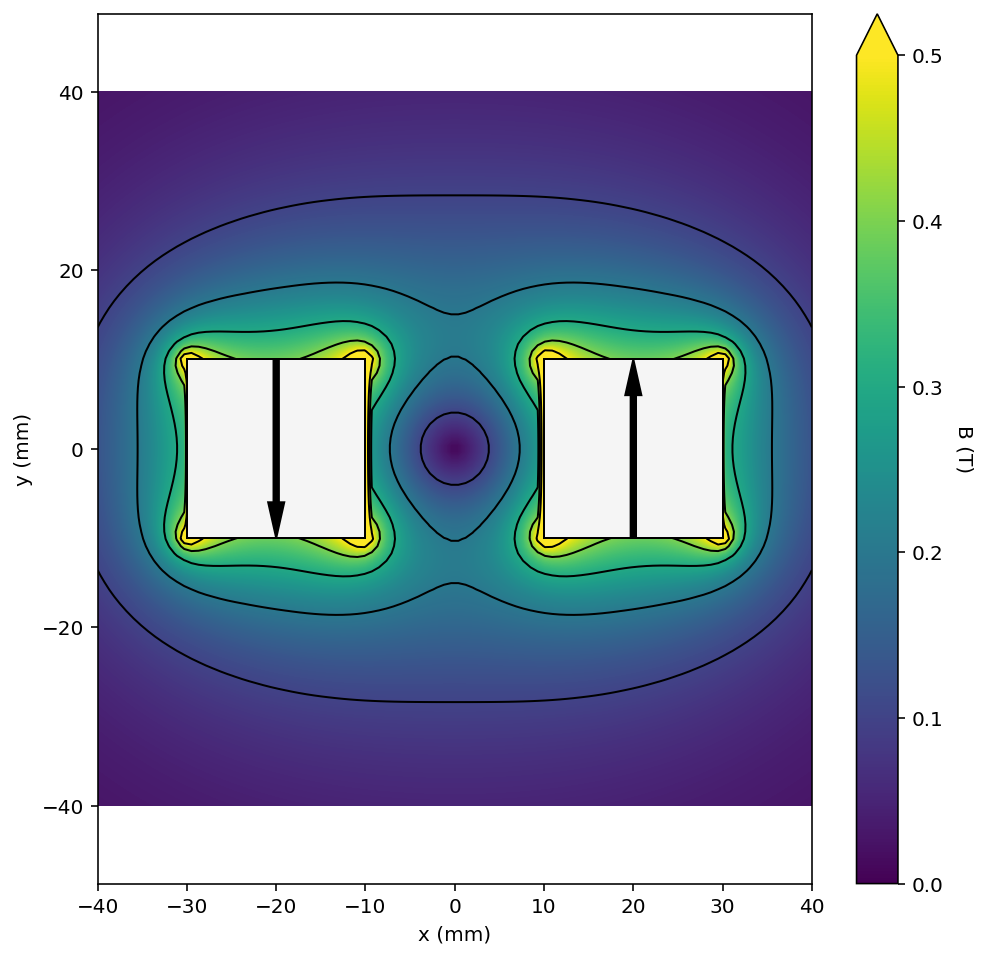

In [3]:
pm.reset_magnets();

unit = 'mm'
width = 20
height = 20
hgap_x = width/2
hgap_y = height/2

center = (-width/2 - hgap_x, 0)
m1 = pm.magnets.Rectangle(width = width, height = height,
                              Jr = -1.0, center=center, theta = 90.0)
center = (width/2 + hgap_x, 0)
m2 = pm.magnets.Rectangle(width = width, height = height,
                               Jr = 1.0, center=center, theta = 90.0)

points = pm.grid2D(2*width, 2*height, unit=unit)
B = pm.get_field_2D(points)

_, _ = pm.plots.plot_2D_contour(points, B, cmax=.5, num_levels=6)

In [4]:
m1

Rectangle
J: [-0. -1.] (T)
Size: [20 20]
Center [-20.   0.]
Orientation: alpha 0.0

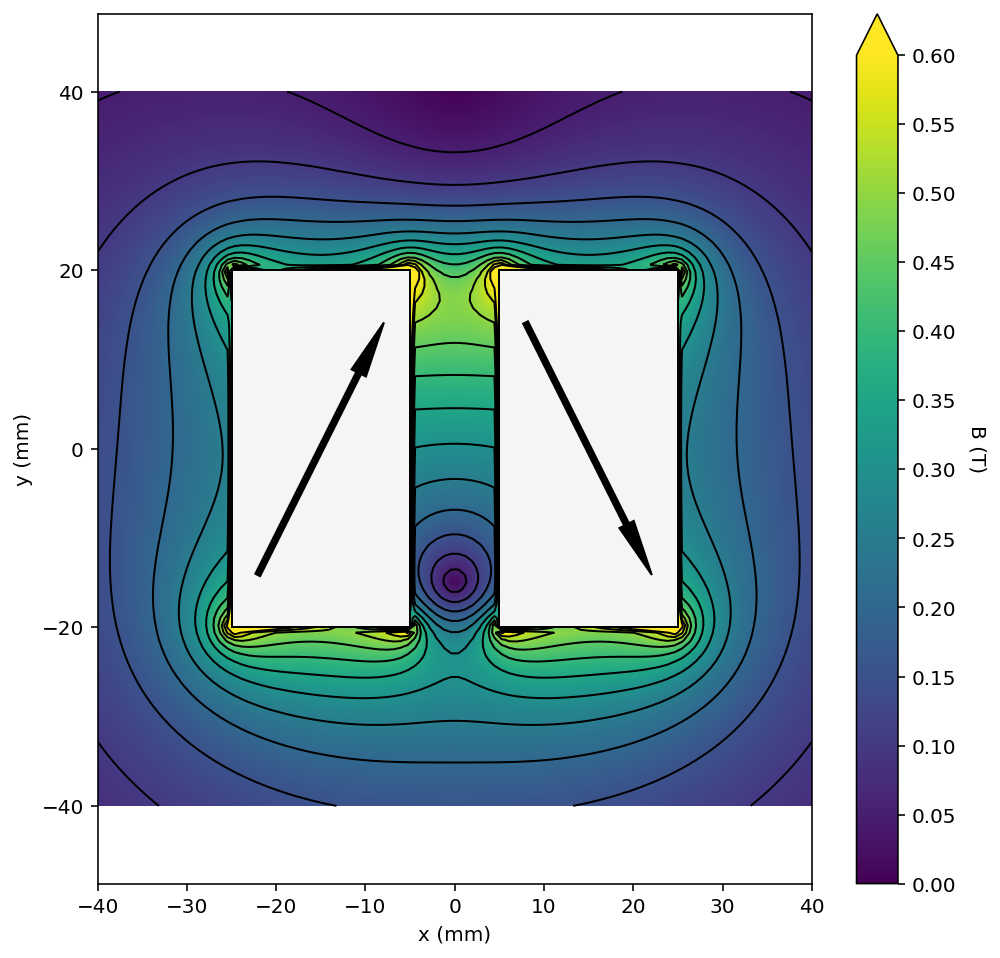

In [5]:
pm.reset_magnets();
width = 20
height = 40
center = (-0.75*width, 0)
m_rec1 = pm.magnets.Rectangle(width = width, height = height, Jr = 1.0, center=center, phi = 45.0)
center = (0.75*width, 0)
m_rec2 = pm.magnets.Rectangle(width = width, height = height, Jr = 1.0, center=center, phi = -45.0)


points = pm.grid2D(2*width, height)
B = pm.get_field_2D(points)

_, _ = pm.plots.plot_2D_contour(points, B, cmax=.6, num_levels=13)

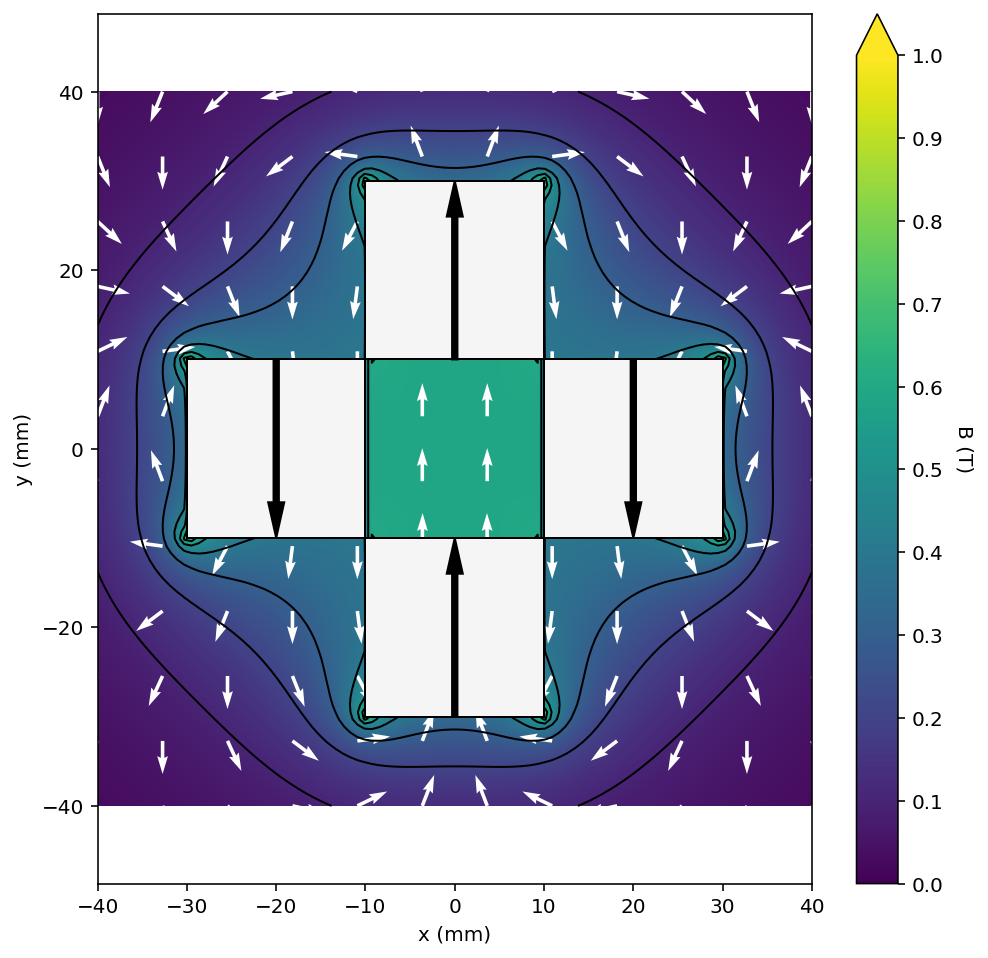

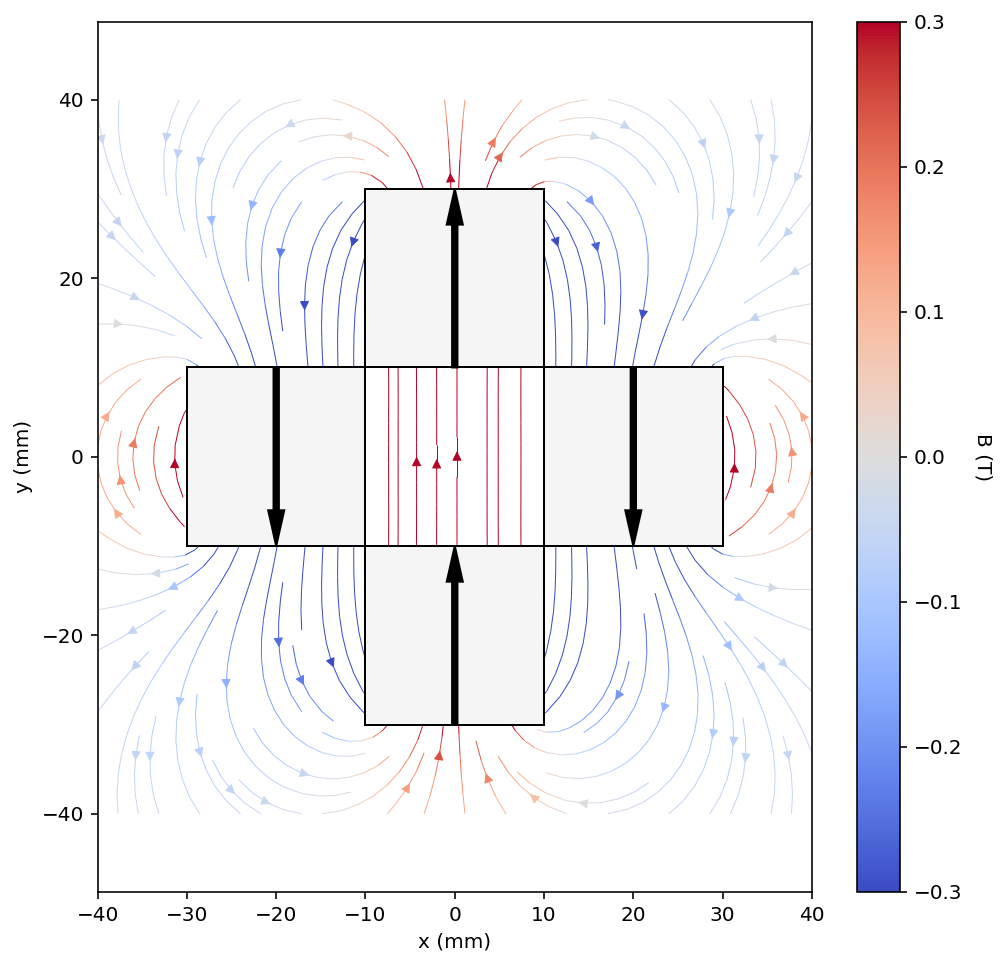

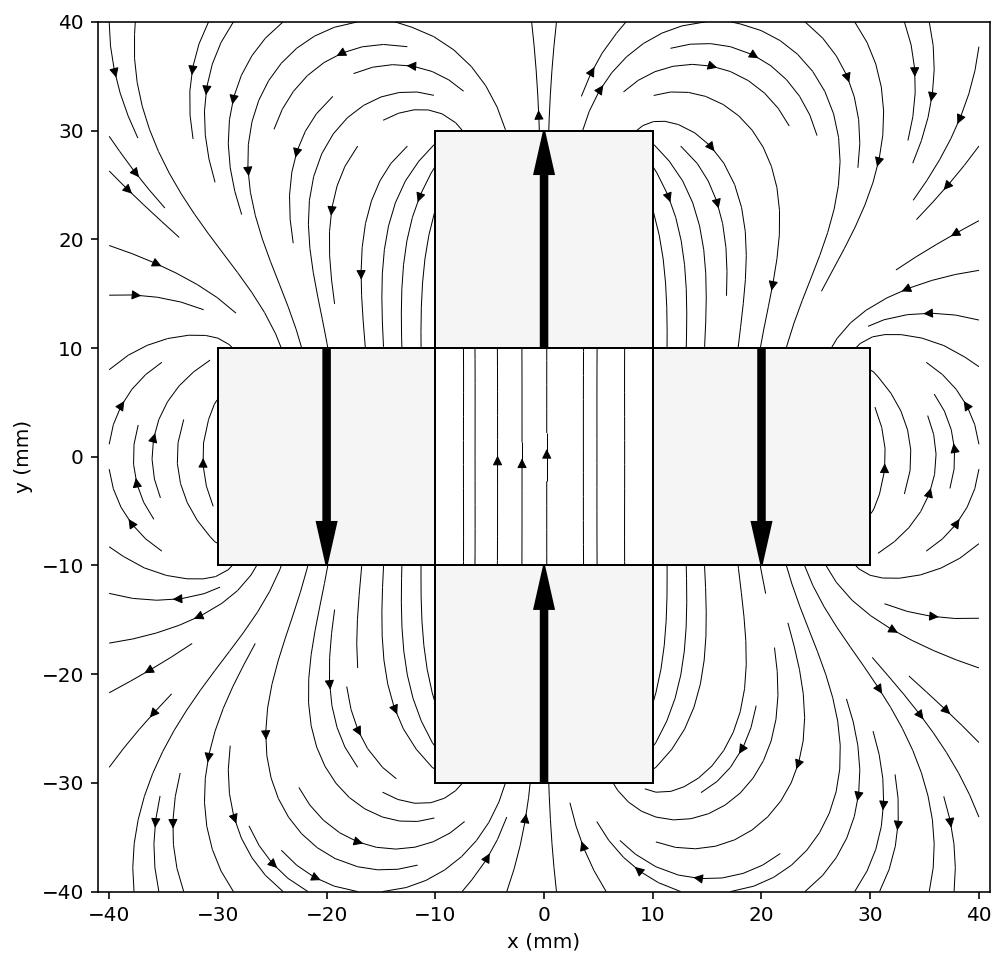

In [6]:
pm.reset_magnets();

unit = 'mm'
width = 20
height = 20
hgap_x = width/2
hgap_y = height/2

phi = 90
alpha = 0

center = (width/2 + hgap_x, 0)
_ = pm.magnets.Rectangle(width = width, height = height,
                               Jr = -1.0, center=center, phi = phi,
                        alpha = alpha)

center = (-width/2 - hgap_x, 0)
_ = pm.magnets.Rectangle(width = width, height = height,
                               Jr = -1.0, center=center, phi = phi,
                        alpha=alpha)

center = (0, height/2 + hgap_y)
_ = pm.magnets.Rectangle(width = width, height = height,
                               Jr = 1.0, center=center, phi = phi,
                        alpha = alpha)

center = (0, -height/2 - hgap_y)
_ = pm.magnets.Rectangle(width = width, height = height,
                               Jr = 1.0, center=center, phi = phi,
                        alpha=alpha)




points = pm.grid2D(2*width, 2*height, unit=unit)
field = pm.get_field_2D(points)

_, _ = pm.plots.plot_2D_contour(points, field,
                         cmax=1.0,
                         num_levels=11,
                         vector_plot=True,
                         vector_arrows=11)

_, _ = pm.plots.plot_2D_contour(points, field,
                         cmin=-0.3,
                         cmax=0.3,
                         plot_type='streamplot',
                         cmap='coolwarm',
                         stream_color='vertical')


_, _ = pm.plots.plot_2D_contour(points, field,
                         cmin=-0.1,
                         cmax=0.1,
                         plot_type='streamplot')



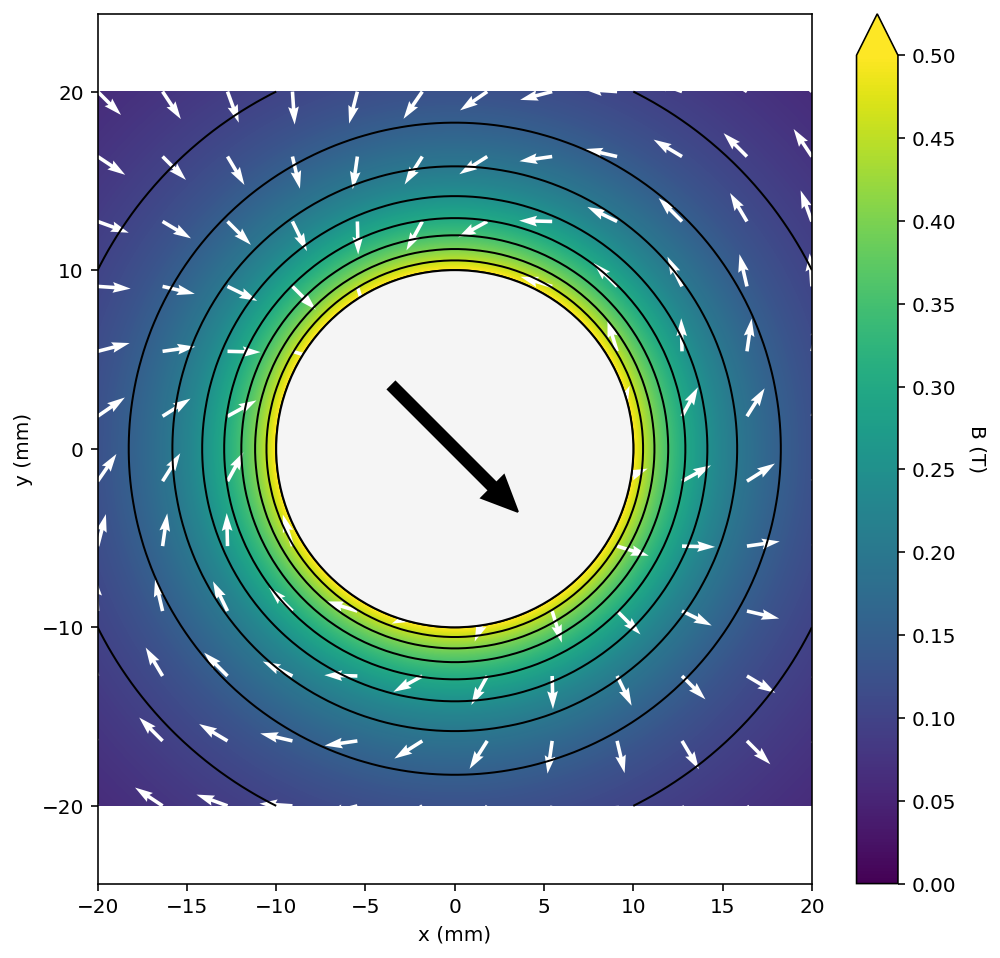

In [7]:
pm.reset_magnets();

radius = 10

center = (0, 0)
_ = pm.magnets.Circle(radius=radius, Jr = 1.0, center=center, alpha=45)


points = pm.grid2D(2*radius, 2*radius)
B = pm.get_field_2D(points)

_, _ = pm.plots.plot_2D_contour(points, B, cmax=0.5, num_lines=6, vector_plot=True, vector_arrows=11)

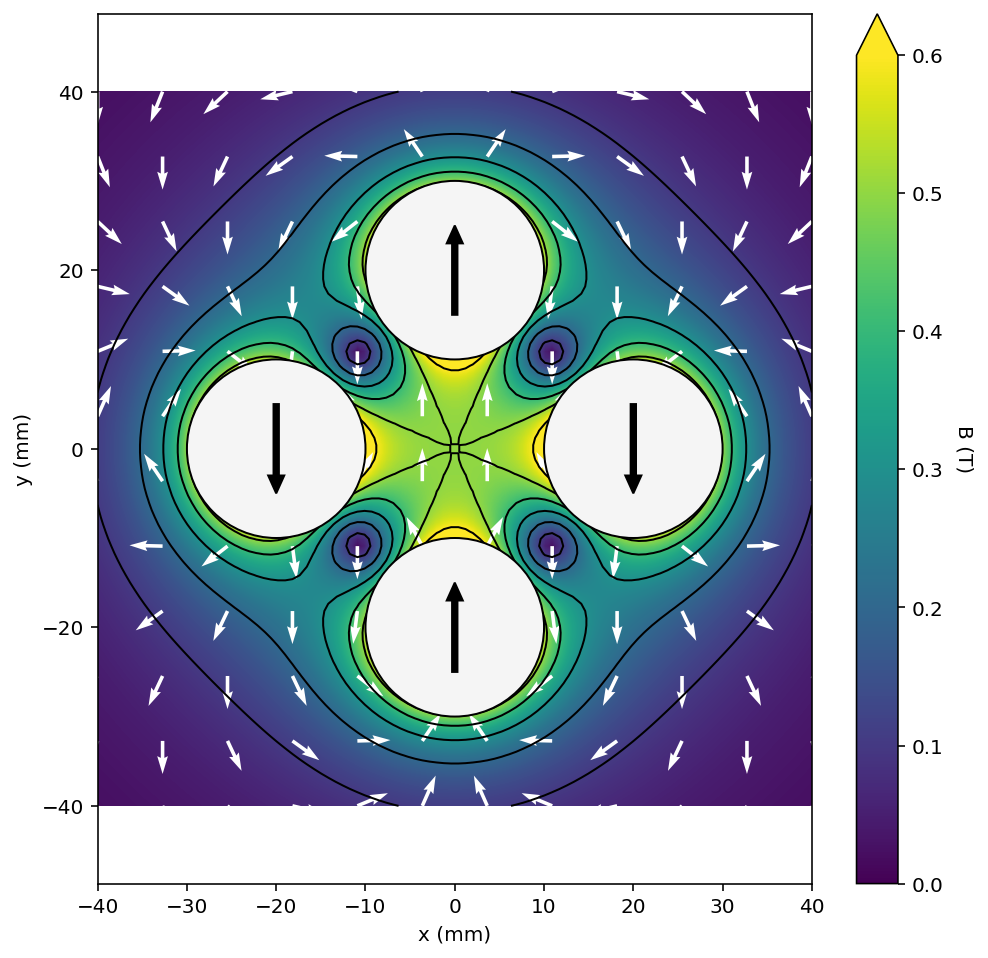

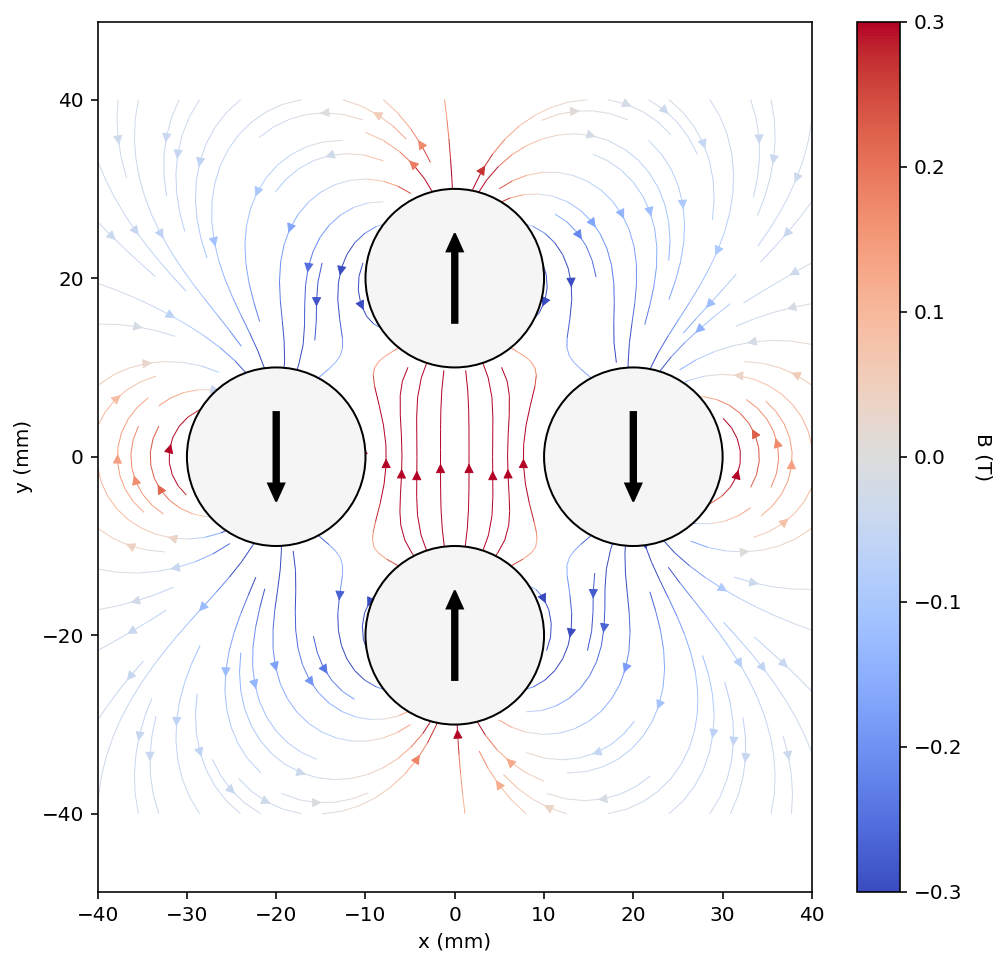

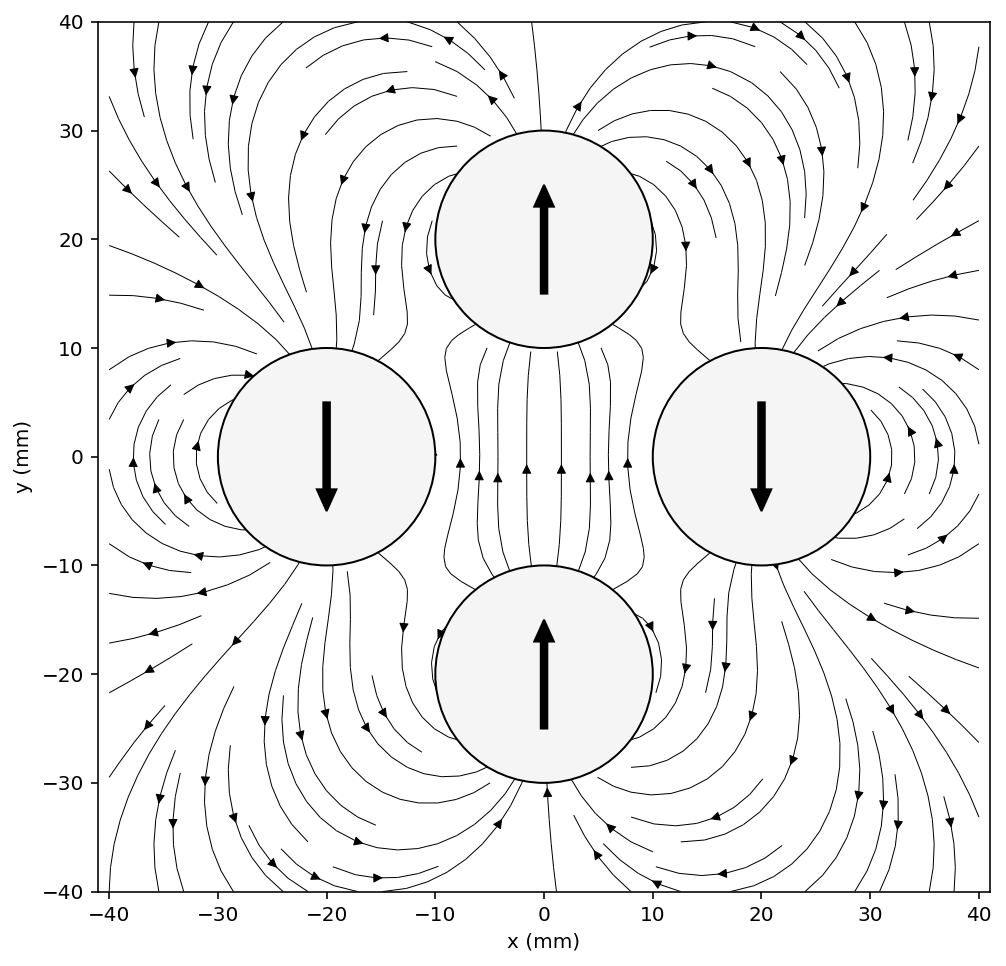

In [8]:
pm.reset_magnets()
units = 'mm'
radius = 10

width = 20
height = 20
hgap_x = width/2
hgap_y = height/2


center = (0, -2*radius)
# center = (0, 0)

_ = pm.magnets.Circle(radius=radius, Jr = 1.0, center=center, alpha = -90)

center = (0, 2*radius)
_ = pm.magnets.Circle(radius=radius, Jr = 1.0, center=center, alpha = -90)

center = (2*radius, 0)
_ = pm.magnets.Circle(radius=radius, Jr = 1.0, center=center, alpha = 90)

center = (-2*radius, 0)
_ = pm.magnets.Circle(radius=radius, Jr = 1.0, center=center, alpha = 90)


points = pm.grid2D(4*radius, 4*radius)
field = pm.get_field_2D(points)

_, _ = pm.plots.plot_2D_contour(points, field,
                         cmin = 0.0,
                         cmax=0.6,
                         num_levels=7,
                         vector_plot=True,
                         vector_arrows=11)
    
    
_, _ = pm.plots.plot_2D_contour(points, field,
                         cmin = -0.3,
                         cmax=0.3,
                         cmap='coolwarm',
                         plot_type="streamplot",
                         stream_color= 'vertical')

_, _ = pm.plots.plot_2D_contour(points, field, plot_type="streamplot")


## 3D Arrangements

Here are some matplotlib based routines for plotting magnetic fields in 3D. The plotly routines are preferred (see `3D_examples.ipynb`), but are retained here for convenience.

### A single cuboid magnet

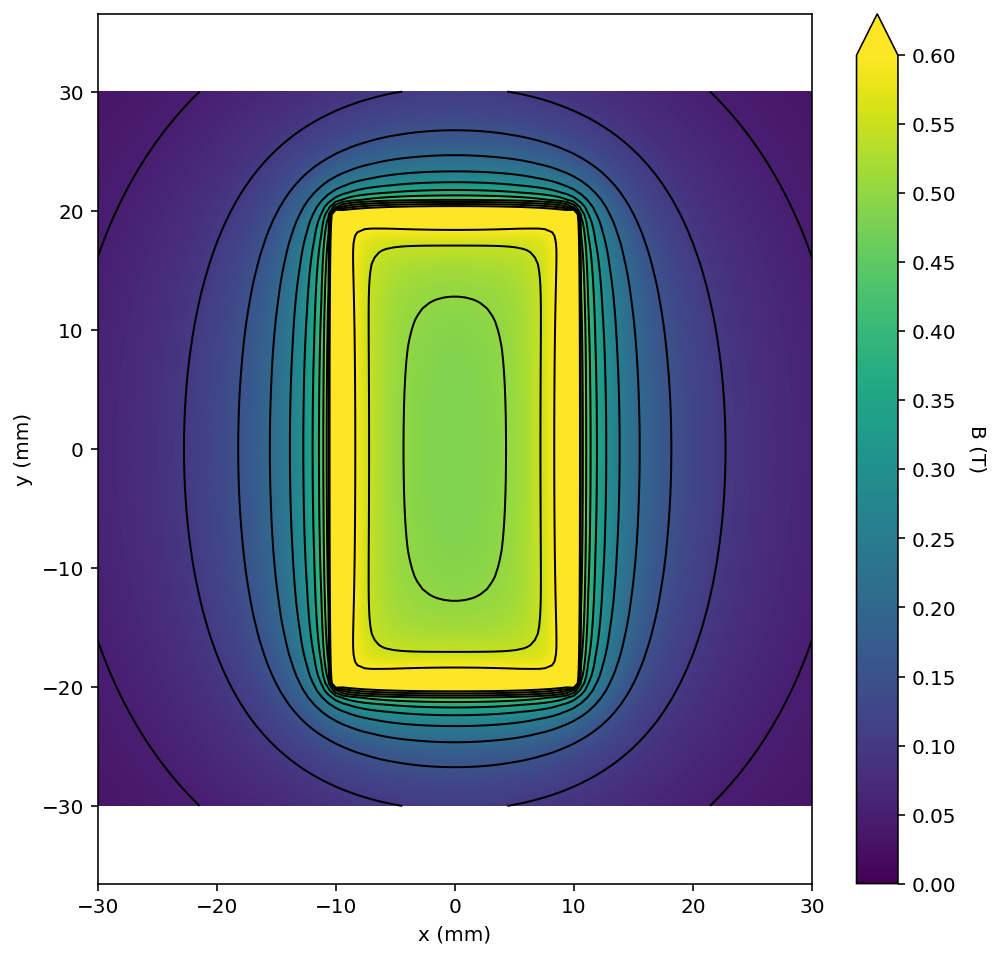

In [9]:
pm.reset_magnets()
a = 20
b = 40
c = 60
unit = 'mm'
center = (0, 0, 0)

# magnetised in x: 
# theta, phi = 0.0, 90.0

# magnetised in y: 
# theta, phi = 90.0, 90.0


# magnetised in z: 
theta, phi = 90.0, 0.0
# or
# theta, phi= 0.0, 0.0
cmap = 'viridis'

magnet = pm.magnets.Prism(width = a, depth = b, height = c, Jr = 1.0, center=center, theta = theta, phi = phi)

plane='xy'
points = pm.slice3D(plane=plane, max1 = c/2, max2 = c/2, slice_value = 1.001*c/2, unit=unit)


field = pm.get_field_3D(points)

_, _ = pm.plots.plot_3D_contour(points, field, plane=plane, cmax=.6, num_levels=13)

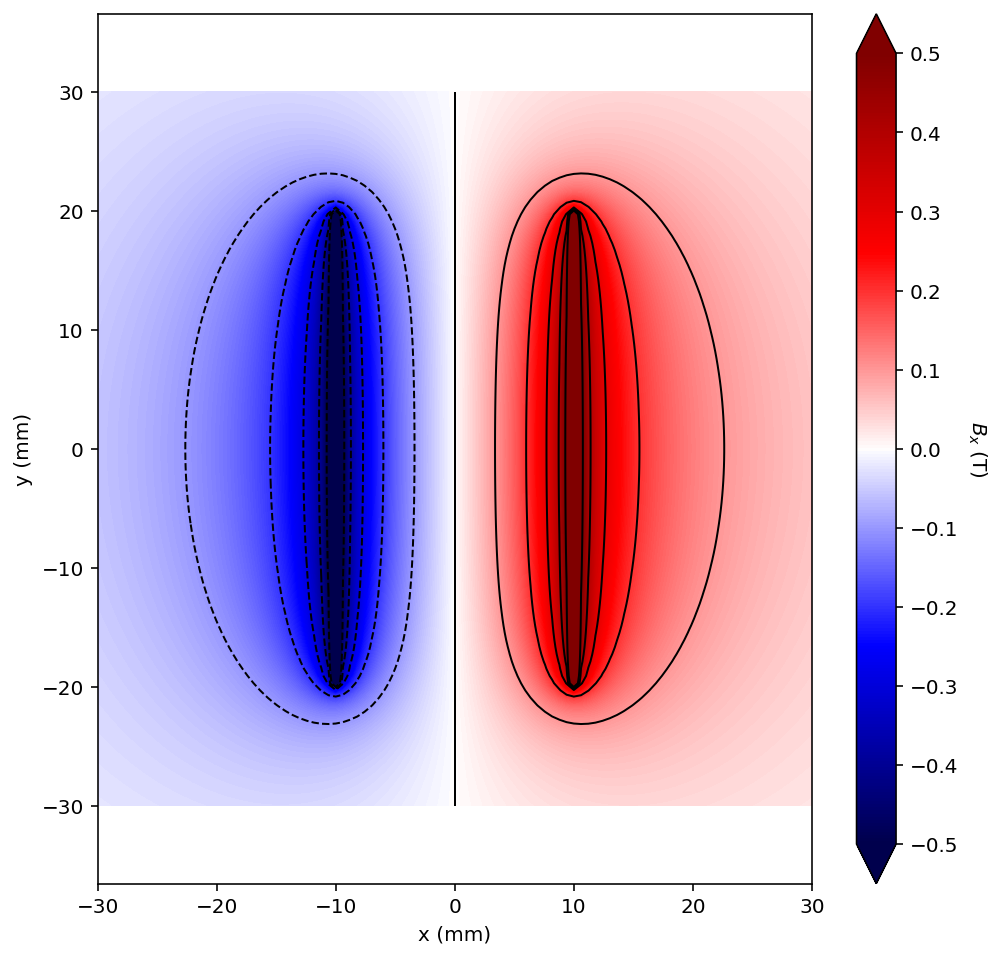

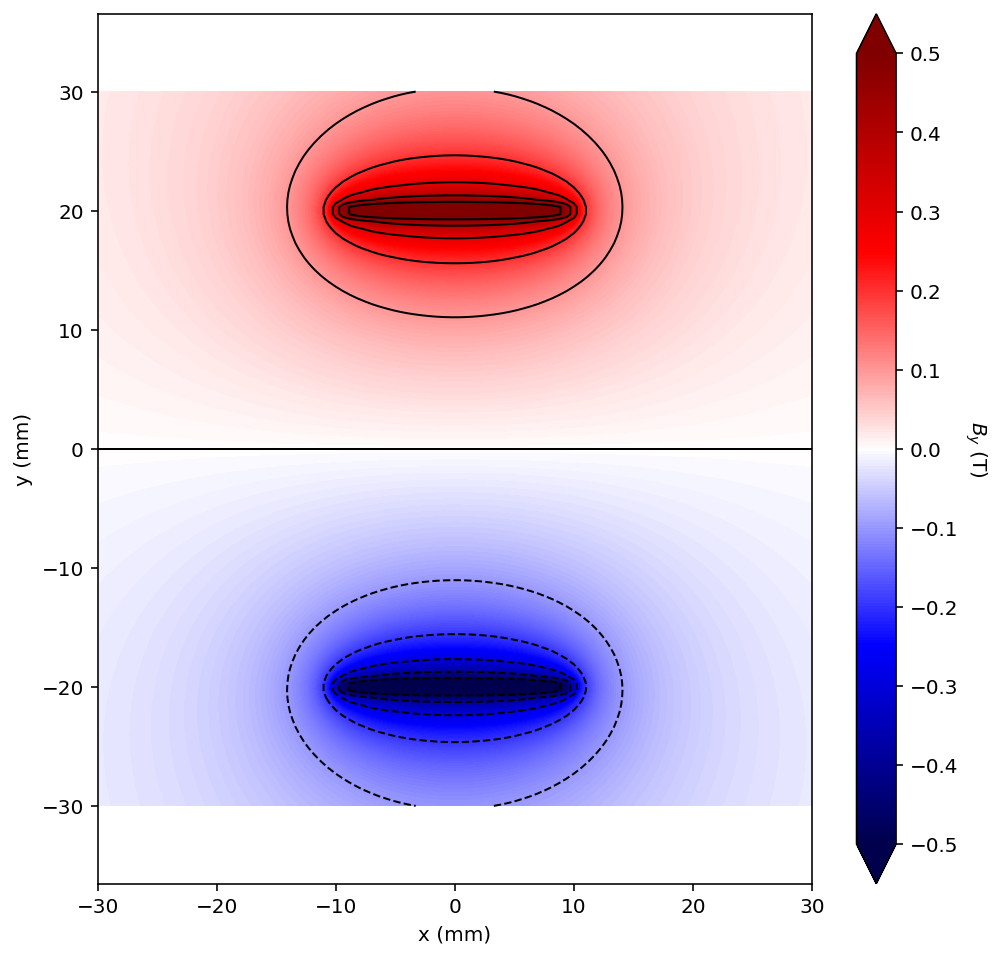

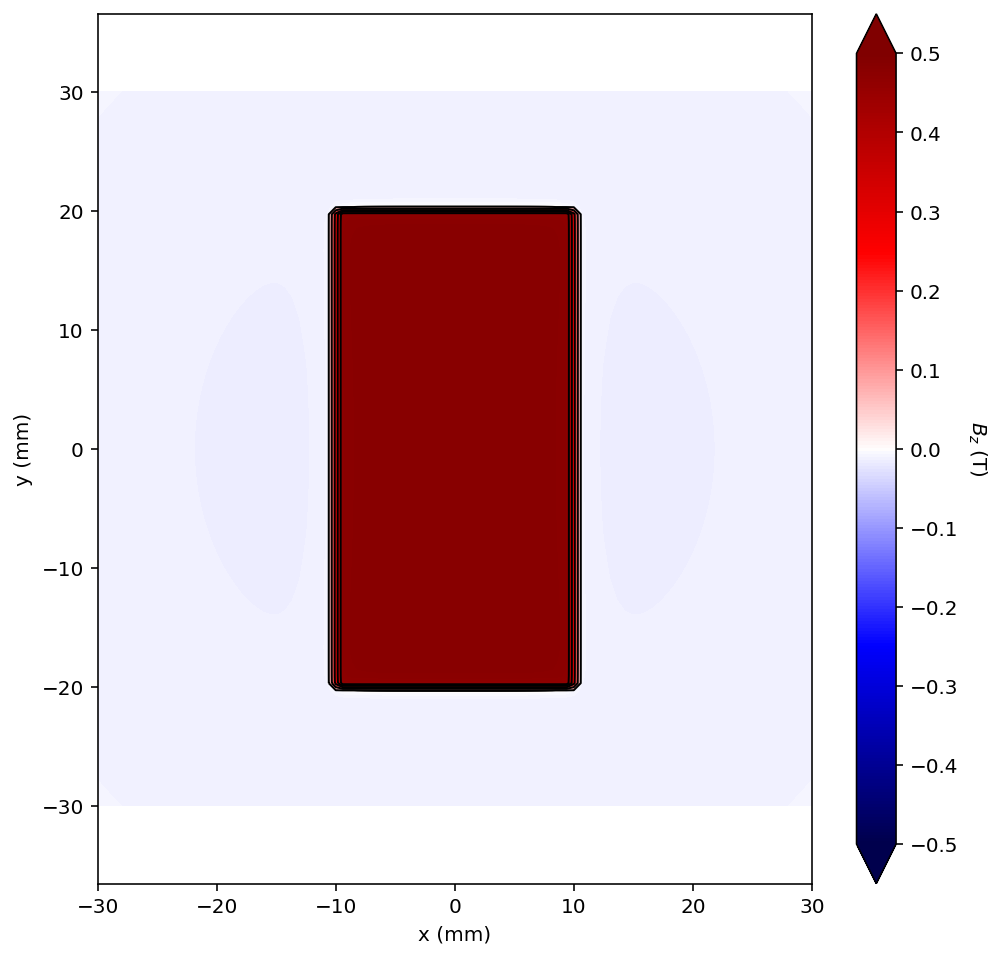

In [10]:
plot_x, plot_y = points.x, points.y
xlab = f'x (' + points.unit + ')'
ylab = 'y (' + points.unit + ')'

plot_B = field.x
clab = r'$B_x$ (' + field.unit + ')'
_, _ = pm.plots.plot_sub_contour_3D(plot_x, plot_y, plot_B, xlab=xlab, ylab=ylab, clab=clab)

plot_B = field.y
clab = r'$B_y$ (' + field.unit + ')'
_, _ = pm.plots.plot_sub_contour_3D(plot_x, plot_y, plot_B, xlab=xlab, ylab=ylab, clab=clab)

plot_B = field.z
clab = r'$B_z$ (' + field.unit + ')'
_, _ = pm.plots.plot_sub_contour_3D(plot_x, plot_y, plot_B, xlab=xlab, ylab=ylab, clab=clab)

### 4-Element Pseudo-Quadrupole

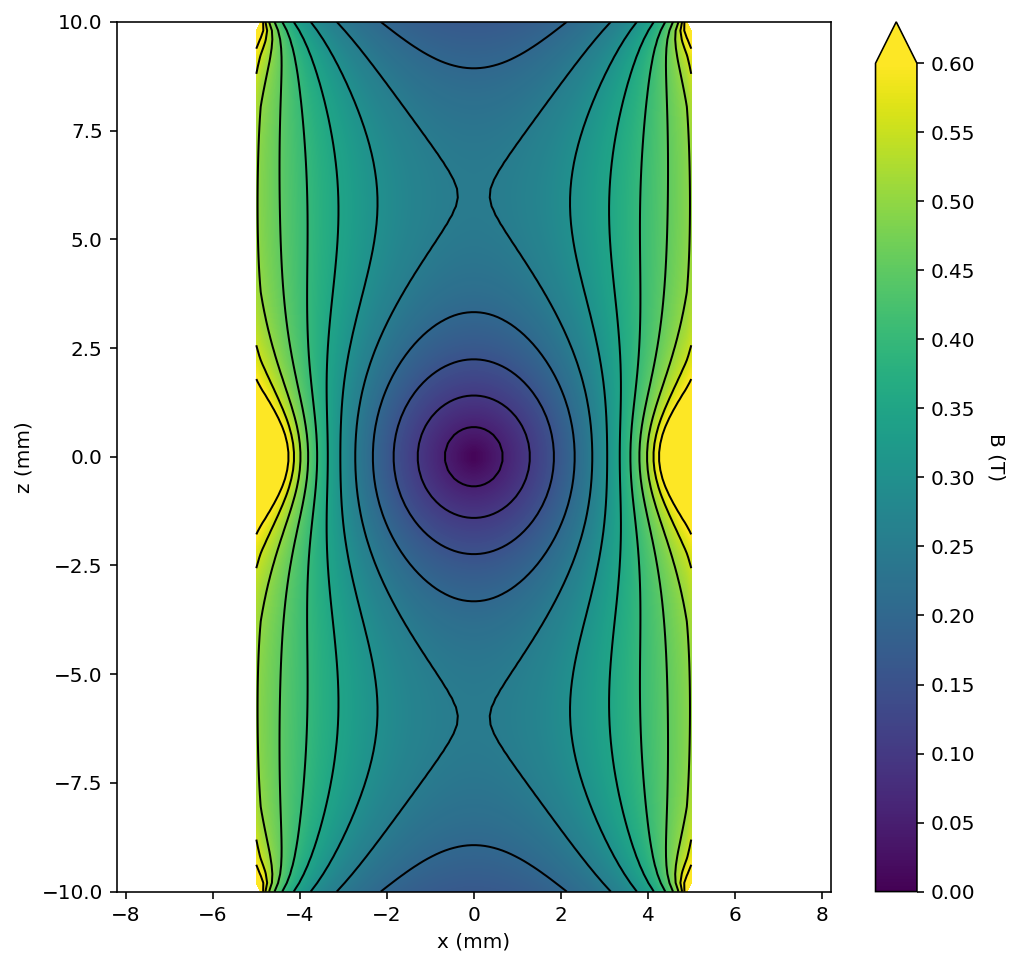

In [11]:
pm.reset_magnets()


a = 10
hGap = a/2
theta, phi = 0.0, 90.0

# Add top left magnet
_ = pm.magnets.Cube(width = a, Jr = 1.0, center=(-a/2 - hGap, 0, a/2), theta = theta, phi = phi)

# Add bottom left magnet
_ = pm.magnets.Cube(width = a, Jr = -1.0, center=(-a/2 - hGap, 0, -a/2), theta = theta, phi = phi)

# Add top right magnet
_ = pm.magnets.Cube(width = a, Jr = 1.0, center=(a/2 + hGap, 0, a/2), theta = theta, phi = phi)

# Add bottom right magnet
_ = pm.magnets.Cube(width = a, Jr = -1.0, center=(a/2 + hGap, 0, -a/2), theta = theta, phi = phi)

plane = 'xz'
points = pm.slice3D(plane=plane, max1 = hGap, max2 = a, slice_value = 0.0)

field = pm.get_field_3D(points)

_, _ = pm.plots.plot_3D_contour(points, field, plane=plane, cmax=.6, num_levels=13)

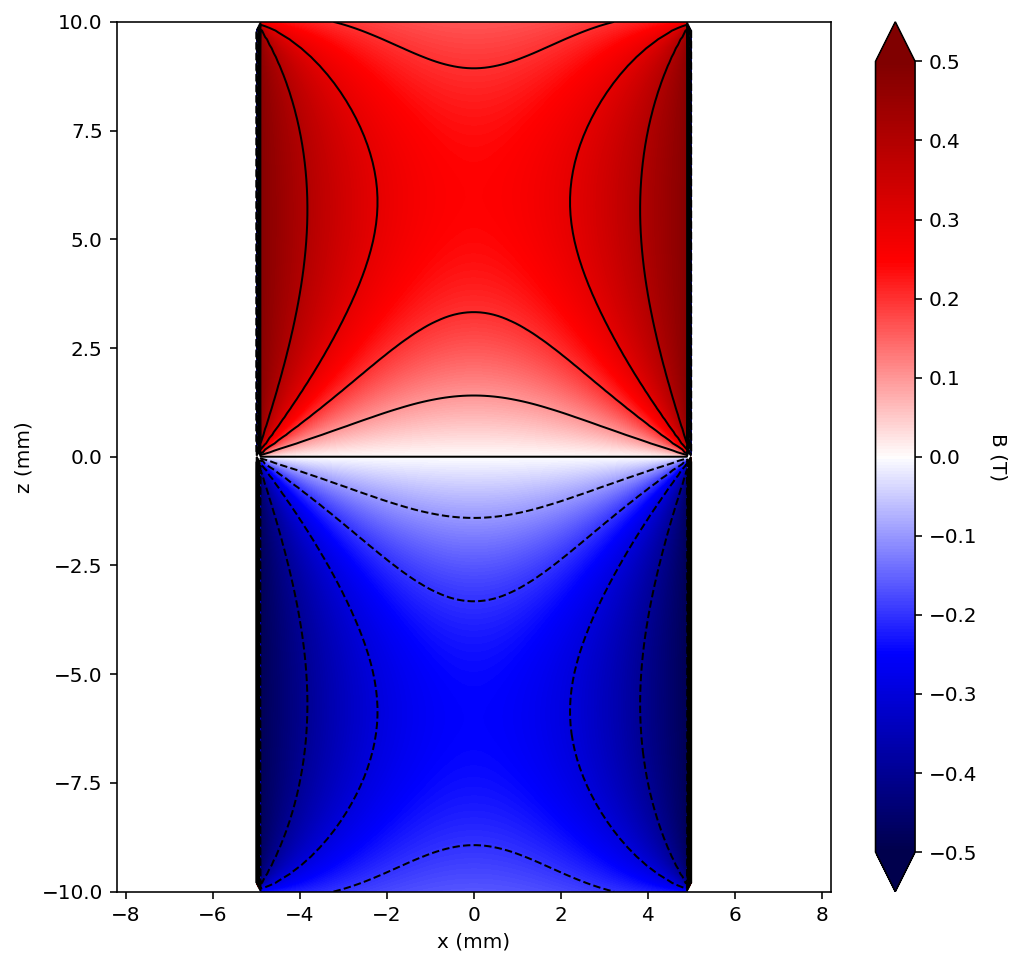

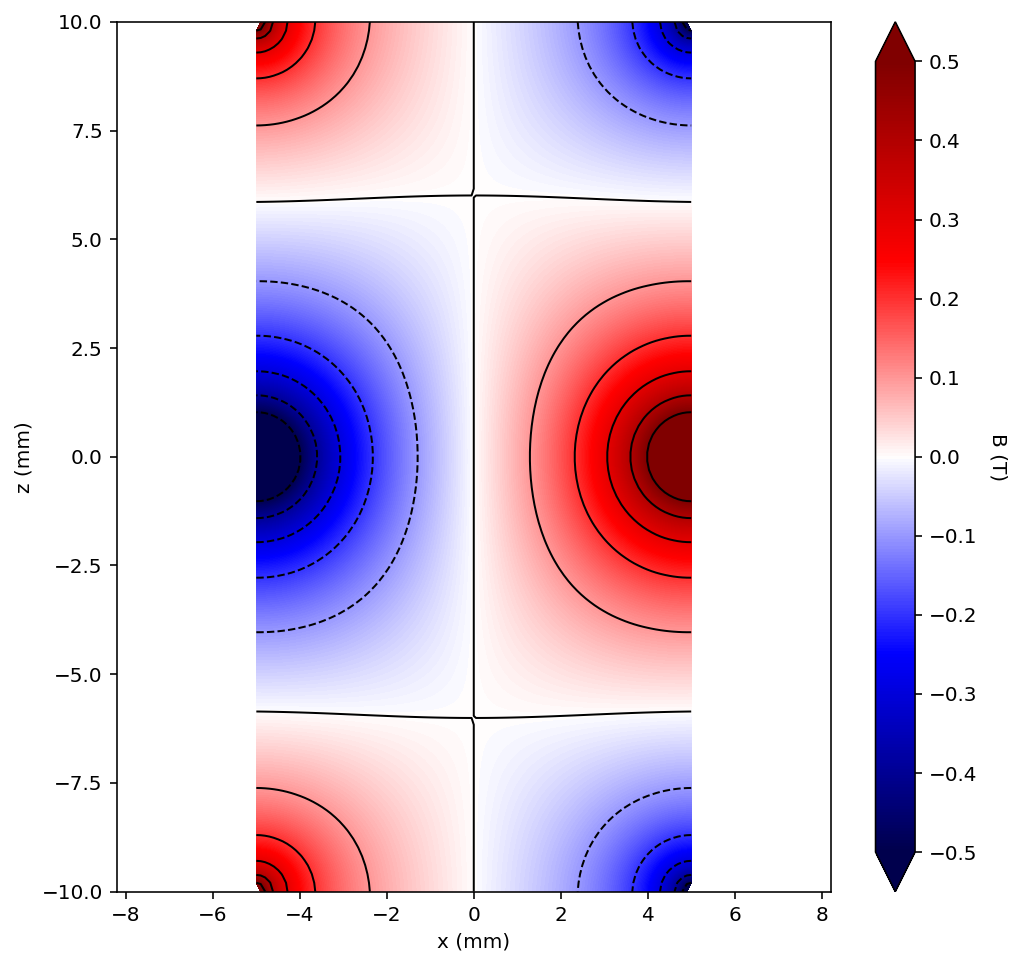

In [12]:
plot_x, plot_y = points.x, points.z
xlab = f'x (' + points.unit + ')'
ylab = 'z (' + points.unit + ')'

plot_B = field.x
clab = r'$B_x$ (' + field.unit + ')'
_, _ =  pm.plots.plot_sub_contour_3D(plot_x, plot_y, plot_B, xlab=xlab, ylab=ylab)

# plot_B = field.y
# clab = r'$B_y$ (' + field.unit + ')'
# _ = pm.plots.plot_sub_contour_3D(plot_x, plot_y, plot_B, xlab=xlab, ylab=ylab)

plot_B = field.z
clab = r'$B_z$ (' + field.unit + ')'
_, _ =  pm.plots.plot_sub_contour_3D(plot_x, plot_y, plot_B, xlab=xlab, ylab=ylab)

### Cross-section of a cylinder

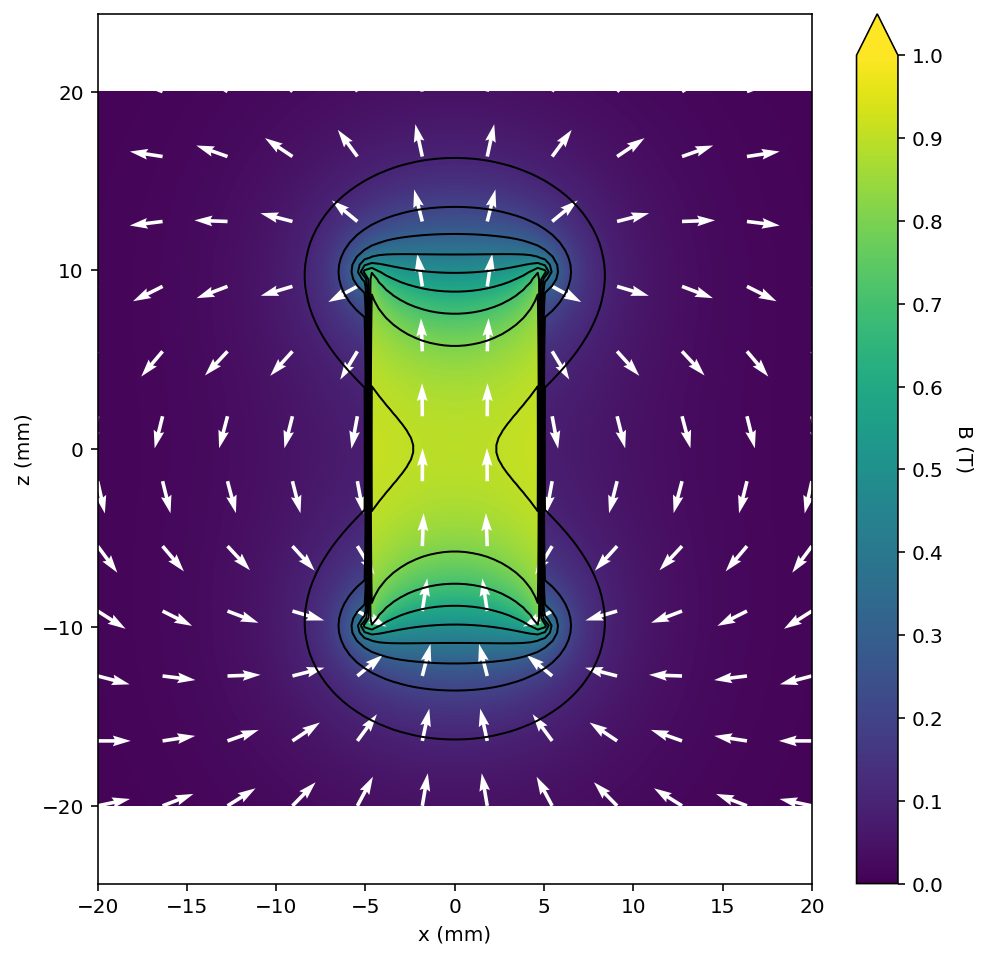

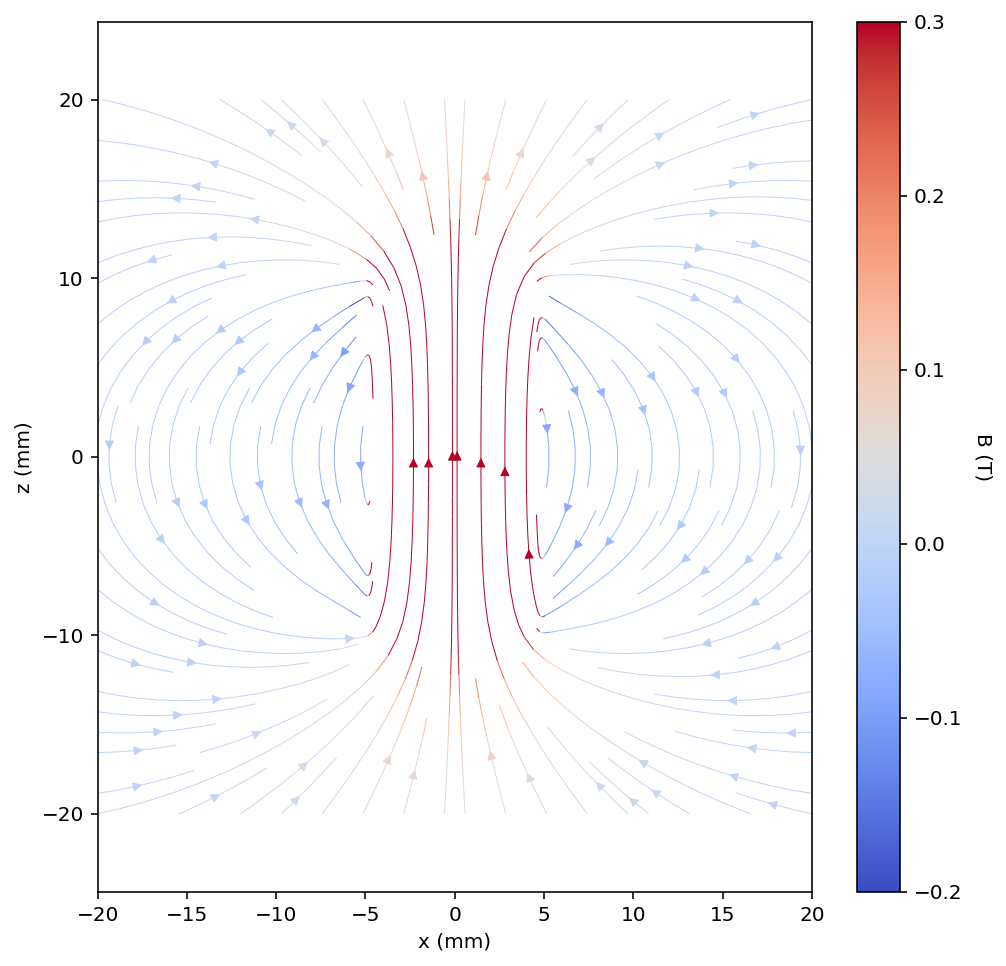

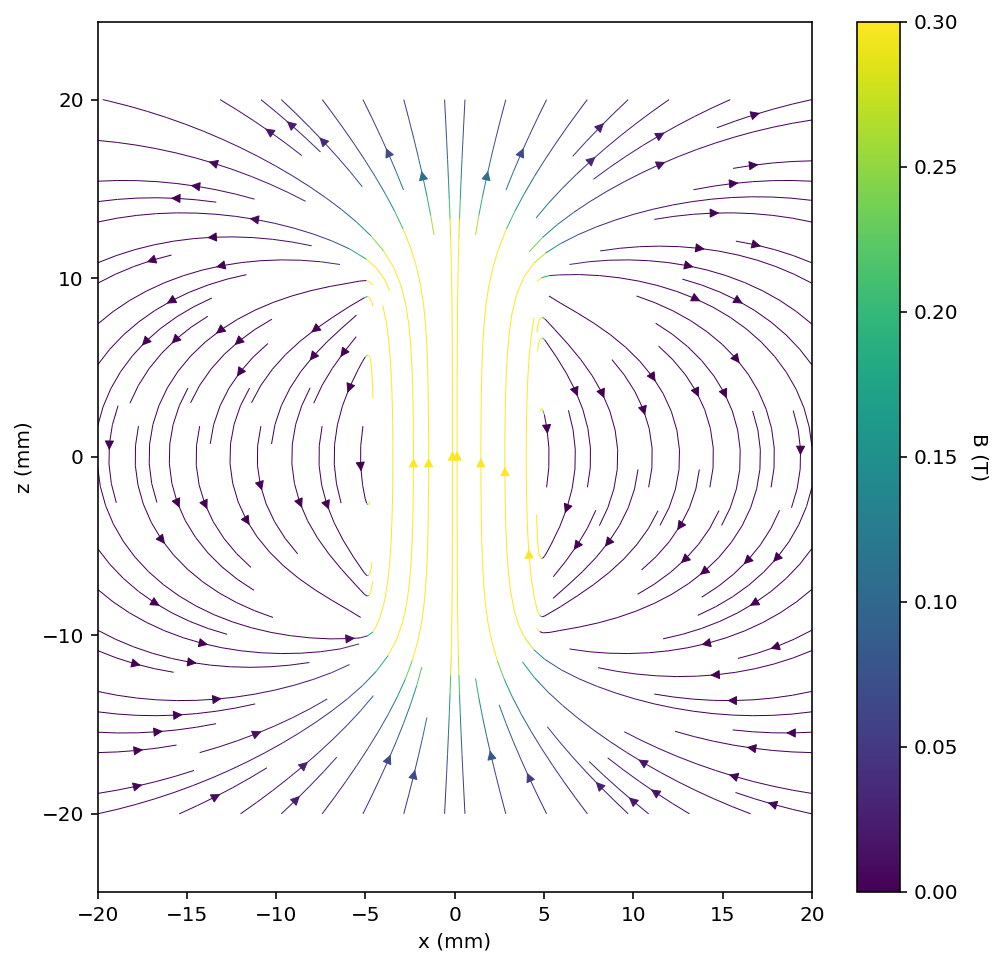

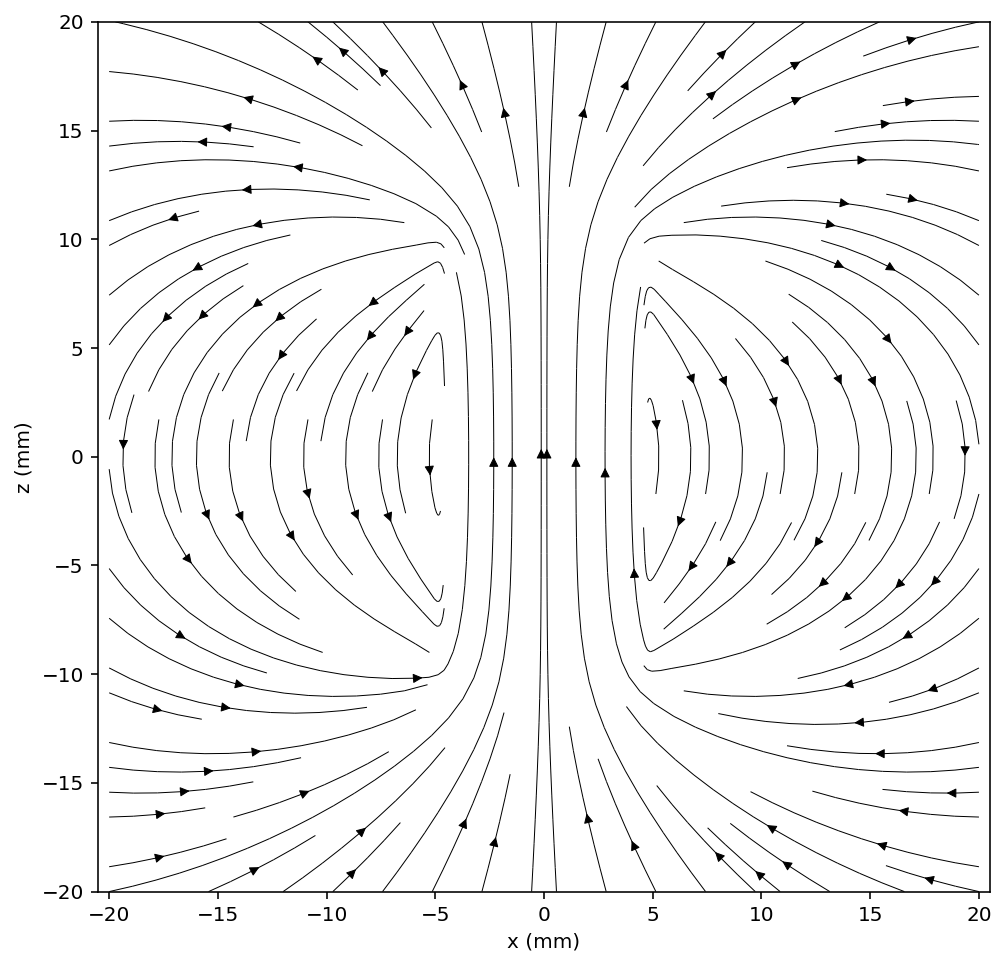

In [13]:
pm.reset_magnets()
unit = 'mm'
a = 10
theta = 0
phi = 0

R = 5
L = 20

m_cyl = pm.magnets.Cylinder(radius = R, length = L, Jr = 1.0,
                            center=(0.0, 0.0, 0.0))

plane = 'xz'
points = pm.slice3D(plane=plane, max1 = 4*R, max2 = L, slice_value = 0.0, unit=unit)

field = pm.get_field_3D(points)

_, _ = pm.plots.plot_3D_contour(points, field, plane=plane, cmax=1, num_levels=11, vector_plot=True, vector_arrows = 11)

_, _ = pm.plots.plot_3D_contour(points, field, plane=plane, cmin = -0.2, cmax=0.2, plot_type='streamplot', cmap='coolwarm')

_, _ = pm.plots.plot_3D_contour(points, field, plane=plane, cmin = 0, cmax=1.0, plot_type='streamplot', cmap='viridis', stream_color='normal')

_, _ = pm.plots.plot_3D_contour(points, field, plane=plane, cmin = 0, cmax=1.0, plot_type='streamplot')